In [1]:
import numpy as np

import datasets
import utils

from ela import generator, random

predictions = utils.TestPredictions('nopoolrefinenet_dpn92_oc', mode='val').load_raw()
samples = utils.get_train_samples()
transforms = generator.TransformationsGenerator([])
dataset = datasets.AnalysisDataset(samples, './data/train', transforms, predictions)

In [2]:
import torch
from tqdm import tqdm
from metrics import mAP

data = []


for i in tqdm(range(len(dataset))):   
    prediction, target, id = dataset[i]
    
    prediction_tensor = torch.FloatTensor(prediction).unsqueeze(0).unsqueeze(0)
    target_tensor = torch.FloatTensor(target).unsqueeze(0).unsqueeze(0)
    
    score = target_tensor.sum().item() / 101 / 101
        
    data.append((id, prediction, target, score))


100%|██████████| 4000/4000 [00:04<00:00, 874.18it/s]


In [3]:
data = sorted(data, key=lambda x: x[3])
data = [d for d in data if d[3] > 0.01]

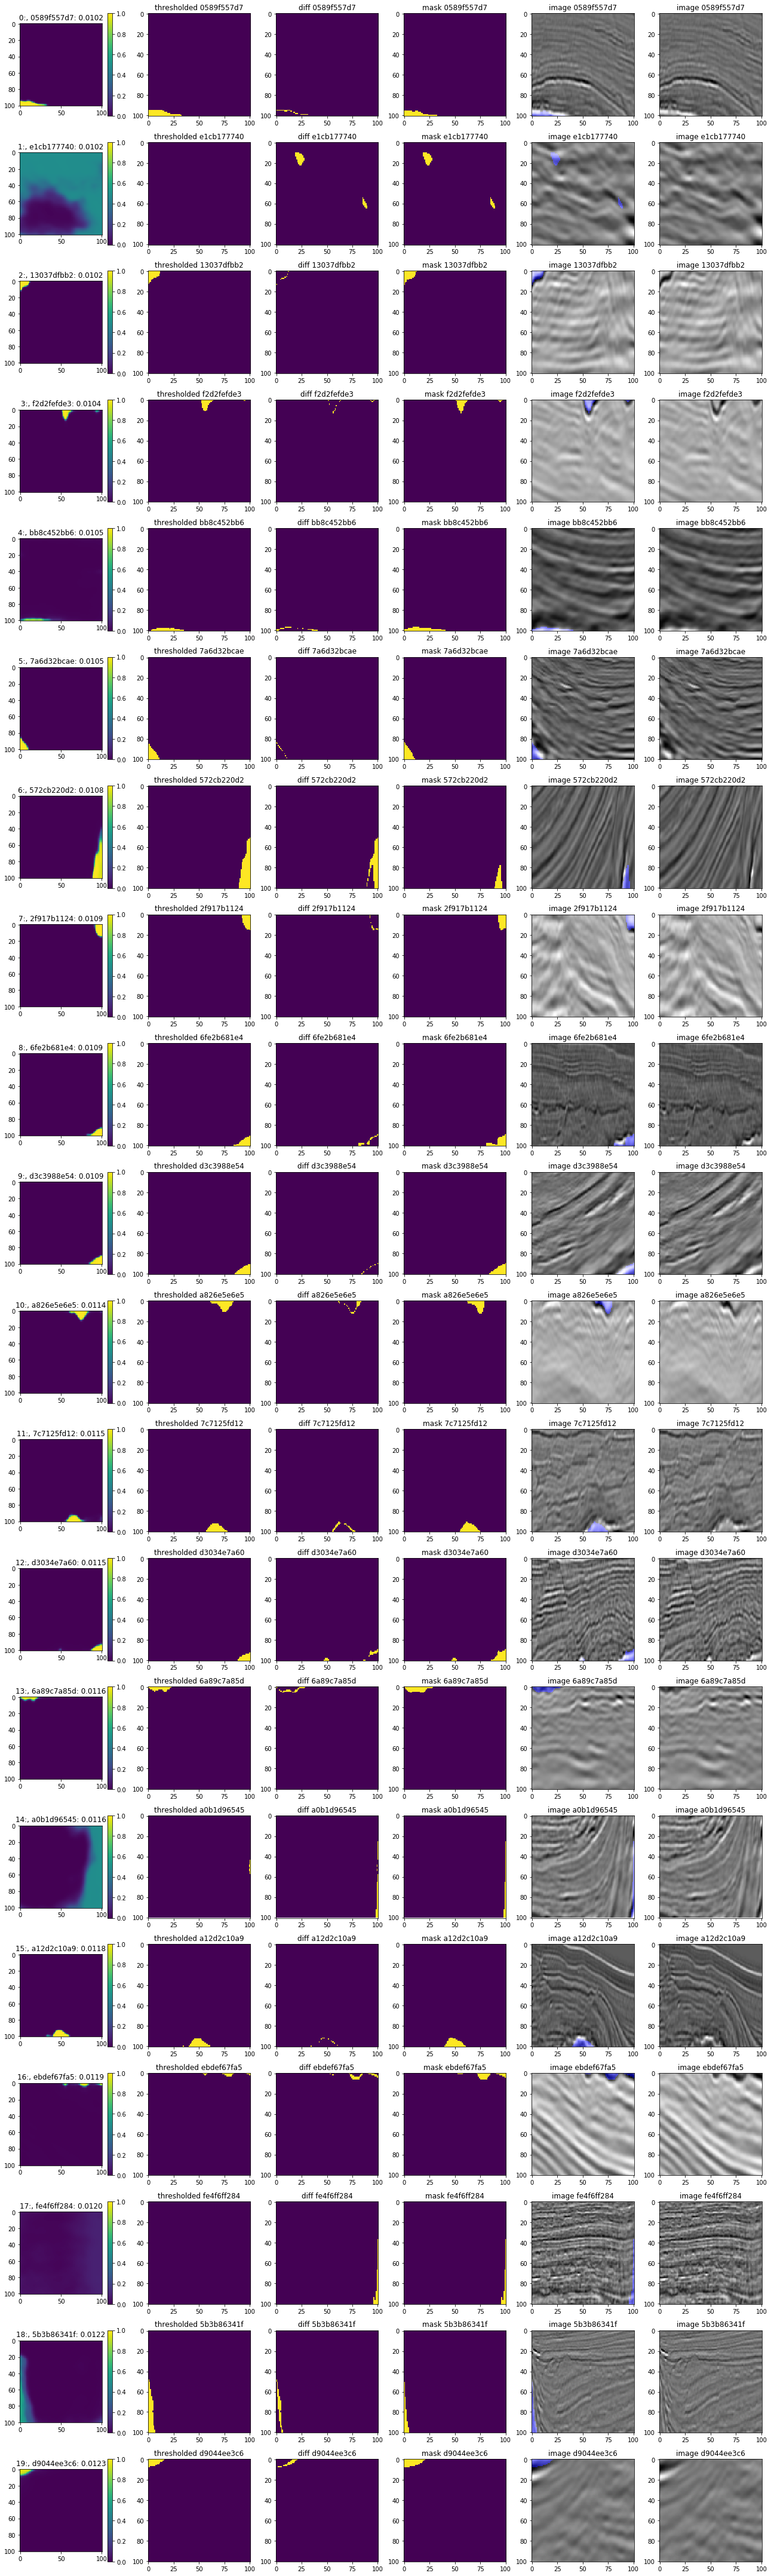

In [4]:
from os.path import join
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from skimage import img_as_float
from skimage.io import imread

rows = 20
cols = 6
fig, ax = plt.subplots(rows, cols, figsize=(cols * 3, rows * 3))
for i, (id, prediction, target, score) in zip(range(rows), data):
    im = ax[i][0].imshow(prediction, vmin = 0, vmax = 1)
    ax[i][0].set_title('{}:, {}: {:6.4f}'.format(i, id, score))
    ax[i][1].imshow(prediction > 0.5)
    ax[i][1].set_title('thresholded {}'.format(id))
    ax[i][2].imshow(np.abs(target - (prediction > 0.5)))
    ax[i][2].set_title('diff {}'.format(id))
    ax[i][3].imshow(target)
    ax[i][3].set_title('mask {}'.format(id))
    overlay = np.repeat(np.expand_dims(0.5*target, axis=2), 3, axis=2)
    overlay[:, :, [0, 1]] = 0
    ax[i][4].imshow(np.clip(overlay + img_as_float(imread(join('./data/train', 'images', id) + '.png')), 0, 1))
    ax[i][4].set_title('image {}'.format(id))    
    fig.colorbar(im, orientation='vertical', ax=ax[i][0])
    ax[i][5].imshow(img_as_float(imread(join('./data/train', 'images', id) + '.png')))
    ax[i][5].set_title('image {}'.format(id))    
    
plt.tight_layout()